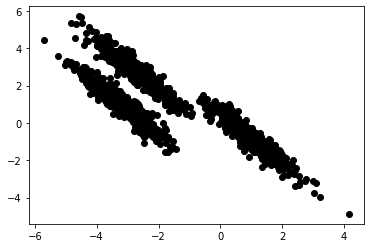

In [19]:
from sklearn import cluster, datasets, mixture
from matplotlib import animation, cbook
from matplotlib.cbook import ls_mapper
from matplotlib.fontconfig_pattern import parse_fontconfig_pattern
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#In this program we are testing and learning about the clustering algorithms, in which get to see how many
#cluster centers are displayed by all algorithms. Some algorithms will have different displays and ways
#to show how the clustering centers. 

n_samples = 1500
random_state = 170
X,y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6,-0.6],[-0.4,0.8]]
X_aniso = np.dot(X,transformation)
plt.plot(X_aniso[:,0],X_aniso[:,1],'o',color='black')
plt.show()


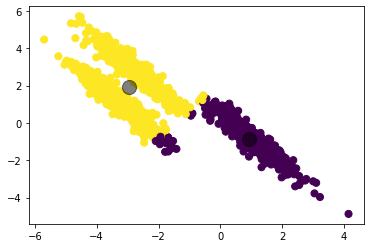

In [35]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_aniso)
ykmeans = kmeans.predict(X_aniso)
centers = kmeans.cluster_centers_
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=ykmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

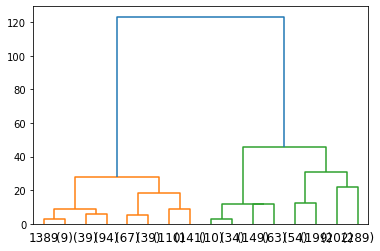

<Figure size 360x360 with 0 Axes>

In [98]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

ag = AgglomerativeClustering(distance_threshold=0,n_clusters=None).fit(X_aniso)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(ag,truncate_mode='level',p=3)
plt.figure(figsize=(5,5))
plt.show()

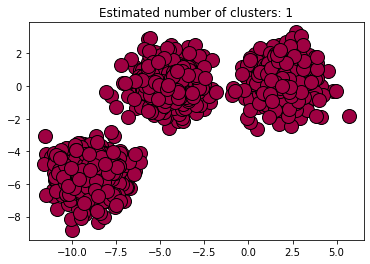

In [38]:
from sklearn.cluster import DBSCAN

#Computing DBSCAN
db = DBSCAN(eps=3, min_samples=2).fit(X_aniso)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

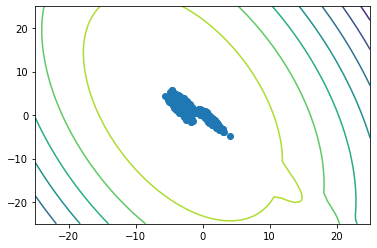

In [87]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X_aniso)
Z = gm.score_samples(X_aniso)
X, Y = np.meshgrid(np.linspace(-25,25), np.linspace(-25,25))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gm.score_samples(XX)
Z = Z.reshape((50,50))
#y_gm = gm.predict(X_aniso)

#X_aniso.shape
plt.contour(X,Y ,Z)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.show()

Report
-------------
GaussianMixture, DBSCAN, and the AgglomerativeClustering algorithm, all of them were able to display and pick up only one cluster from the dataset. On the other hand KMeans was able to calculate two cluster center from the dataset from X_aniso. Out all the algorithm, I would lean towards Kmeans since it gives us the more cluster centers to work with along our scatter data.